In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'

# Define the path where the model checkpoint will be saved (with proper path format)
model_save_path = r'grimm\PycharmProjects\hand-gesture-recognition-mediapipe\model\keypoint_classifier\keypoint_classifier.keras'

# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

# You can now use these callbacks during model training:
# model.fit(X_train, y_train, epochs=100, callbacks=[cp_callback, es_callback])


# 分類数設定

In [25]:
NUM_CLASSES = 6

# 学習データ読み込み

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 9s 349ms/step - accuracy: 0.0625 - loss: 2.0222
Epoch 1: saving model to grimm\PycharmProjects\hand-gesture-recognition-mediapipe\model\keypoint_classifier\keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0773 - loss: 1.9791 - val_accuracy: 0.2572 - val_loss: 1.7389
Epoch 2/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2109 - loss: 1.7578
Epoch 2: saving model to grimm\PycharmProjects\hand-gesture-recognition-mediapipe\model\keypoint_classifier\keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2342 - loss: 1.7574 - val_accuracy: 0.4045 - val_loss: 1.6213
Epoch 3/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3438 - loss: 1.6719
Epoch 3: saving model to grimm\PycharmProjects\hand-gesture-recognition-mediapipe\model\keypoint_classifier\keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3428 - loss: 1.6372 - val_accuracy: 0.4080 - val_loss

In [34]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9692 - loss: 0.2051 


In [35]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [36]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[4.1954637e-02 7.1722388e-02 8.7705678e-01 8.6475220e-03 5.7122717e-04
 4.7421348e-05]
2


# 混同行列

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step


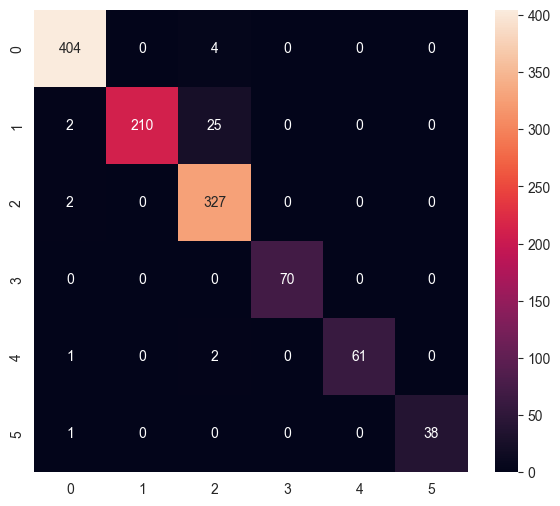

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       1.00      0.89      0.94       237
           2       0.91      0.99      0.95       329
           3       1.00      1.00      1.00        70
           4       1.00      0.95      0.98        64
           5       1.00      0.97      0.99        39

    accuracy                           0.97      1147
   macro avg       0.98      0.97      0.97      1147
weighted avg       0.97      0.97      0.97      1147



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [38]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\grimm\AppData\Local\Temp\tmpx0n8ggq1\assets


INFO:tensorflow:Assets written to: C:\Users\grimm\AppData\Local\Temp\tmpx0n8ggq1\assets


Saved artifact at 'C:\Users\grimm\AppData\Local\Temp\tmpx0n8ggq1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2614704504176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2614869353648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2614704496960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2614869345904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2614869344496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2614871934928: TensorSpec(shape=(), dtype=tf.resource, name=None)


6644

# 推論テスト

In [39]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\grimm\PycharmProjects\hand-gesture-recognition-mediapipe\.venv\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [40]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [41]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [42]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [43]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.1954637e-02 7.1722366e-02 8.7705678e-01 8.6475220e-03 5.7122711e-04
 4.7421348e-05]
2
